In [15]:
import os
import numpy as np
from random import sample
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

# Load model yang sudah dilatih
model_path = 'inderence time/best_model_efficientnetv2stunned.keras'
model = load_model(model_path)

# Daftar label kelas dari confusion matrix
class_labels = ['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot']

# Path ke folder dataset (pastikan ini diarahkan ke folder gambar Anda)
dataset_path = 'Tea leaf dataset/Tea leaf dataset/Tea red scab'  # Ganti dengan path sebenarnya
image_paths = [os.path.join(dataset_path, fname) for fname in os.listdir(dataset_path) if fname.endswith(('.jpg', '.png'))]

# Validasi apakah jumlah gambar dalam dataset cukup
num_images_to_predict = 5  # Jumlah gambar yang akan diprediksi
if len(image_paths) < num_images_to_predict:
    raise ValueError("Jumlah gambar dalam dataset lebih kecil dari jumlah yang diminta untuk diprediksi.")

# Ambil beberapa gambar secara acak dari dataset
random_image_paths = sample(image_paths, num_images_to_predict)

# Fungsi prediksi untuk satu gambar
def predict_single_image(image_path, model, class_labels):
    # Load dan resize gambar
    img = load_img(image_path, target_size=(384, 384))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch

    # Prediksi
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class_name = class_labels[predicted_class_index]
    confidence = predictions[0][predicted_class_index]

    return predicted_class_name, confidence

# Prediksi pada setiap gambar yang dipilih secara acak
print("Hasil Prediksi:")
for i, image_path in enumerate(random_image_paths, start=1):
    predicted_class_name, confidence = predict_single_image(image_path, model, class_labels)
    print(f"[{i}] Gambar: {os.path.basename(image_path)}")
    print(f"    Diprediksi sebagai: {predicted_class_name}")
    print(f"    Confidence: {confidence:.2f}")


Hasil Prediksi:
1/1 [==============================] - 3s 3s/step
[1] Gambar: Healthy_604.jpg
    Diprediksi sebagai: helopeltis
    Confidence: 1.00
1/1 [==============================] - 0s 192ms/step
[2] Gambar: Healthy_541.jpg
    Diprediksi sebagai: helopeltis
    Confidence: 1.00
1/1 [==============================] - 0s 217ms/step
[3] Gambar: Healthy_133.jpg
    Diprediksi sebagai: helopeltis
    Confidence: 0.88
1/1 [==============================] - 0s 194ms/step
[4] Gambar: Healthy_490.jpg
    Diprediksi sebagai: helopeltis
    Confidence: 1.00
1/1 [==============================] - 0s 202ms/step
[5] Gambar: Healthy_329.jpg
    Diprediksi sebagai: helopeltis
    Confidence: 1.00


Hasil Prediksi:
1/1 [==============================] - 5s 5s/step
[1] Gambar: Healthy_148.jpg
    Diprediksi sebagai: helopeltis
    Confidence: 0.99
1/1 [==============================] - 0s 221ms/step
[2] Gambar: Healthy_499.jpg
    Diprediksi sebagai: helopeltis
    Confidence: 1.00
1/1 [==============================] - 0s 216ms/step
[3] Gambar: Healthy_223.jpg
    Diprediksi sebagai: helopeltis
    Confidence: 0.82
1/1 [==============================] - 0s 223ms/step
[4] Gambar: Healthy_29.jpg
    Diprediksi sebagai: helopeltis
    Confidence: 1.00
1/1 [==============================] - 0s 223ms/step
[5] Gambar: Healthy_399.jpg
    Diprediksi sebagai: helopeltis
    Confidence: 1.00


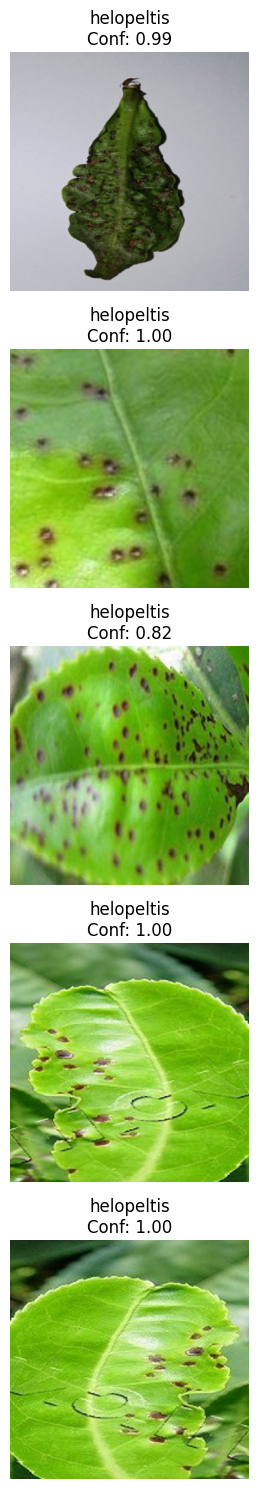

In [23]:
import os
import numpy as np
from random import sample
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

# Load model yang sudah dilatih
model_path = 'inderence time/best_model_efficientnetv2stunned.keras'
model = load_model(model_path)

# Daftar label kelas dari confusion matrix
class_labels = ['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot']

# Path ke folder dataset (pastikan ini diarahkan ke folder gambar Anda)
dataset_path = 'Tea leaf dataset/Tea leaf dataset/Tea red scab'  # Ganti dengan path sebenarnya
image_paths = [os.path.join(dataset_path, fname) for fname in os.listdir(dataset_path) if fname.endswith(('.jpg', '.png'))]

# Validasi apakah jumlah gambar dalam dataset cukup
num_images_to_predict = 5  # Jumlah gambar yang akan diprediksi
if len(image_paths) < num_images_to_predict:
    raise ValueError("Jumlah gambar dalam dataset lebih kecil dari jumlah yang diminta untuk diprediksi.")

# Ambil beberapa gambar secara acak dari dataset
random_image_paths = sample(image_paths, num_images_to_predict)

# Fungsi prediksi untuk satu gambar
def predict_single_image(image_path, model, class_labels):
    # Load dan resize gambar
    img = load_img(image_path, target_size=(384, 384))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch

    # Prediksi
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class_name = class_labels[predicted_class_index]
    confidence = predictions[0][predicted_class_index]

    return predicted_class_name, confidence, img

# Prediksi pada setiap gambar yang dipilih secara acak
print("Hasil Prediksi:")
plt.figure(figsize=(5, 15))  # Atur ukuran grid untuk tampilan gambar (vertikal)
for i, image_path in enumerate(random_image_paths, start=1):
    predicted_class_name, confidence, img = predict_single_image(image_path, model, class_labels)
    
    # Tampilkan hasil di terminal
    print(f"[{i}] Gambar: {os.path.basename(image_path)}")
    print(f"    Diprediksi sebagai: {predicted_class_name}")
    print(f"    Confidence: {confidence:.2f}")
    
    # Plot gambar
    plt.subplot(num_images_to_predict, 1, i)  # Buat grid subplot vertikal
    plt.imshow(img)  # Tampilkan gambar
    plt.title(f"{predicted_class_name}\nConf: {confidence:.2f}")  # Tambahkan prediksi di atas gambar
    plt.axis('off')  # Hilangkan sumbu

plt.tight_layout()
plt.show()


Hasil Prediksi:
1/1 [==============================] - 3s 3s/step
[1] Gambar: Healthy_39.jpg
    Diprediksi sebagai: gray_blight
    Confidence: 1.00
1/1 [==============================] - 0s 163ms/step
[2] Gambar: Healthy_237.jpg
    Diprediksi sebagai: brown_blight
    Confidence: 0.99
1/1 [==============================] - 0s 168ms/step
[3] Gambar: Healthy_73.jpg
    Diprediksi sebagai: brown_blight
    Confidence: 0.62
1/1 [==============================] - 0s 156ms/step
[4] Gambar: Healthy_437.jpg
    Diprediksi sebagai: brown_blight
    Confidence: 0.62
1/1 [==============================] - 0s 151ms/step
[5] Gambar: Healthy_425.jpg
    Diprediksi sebagai: brown_blight
    Confidence: 1.00


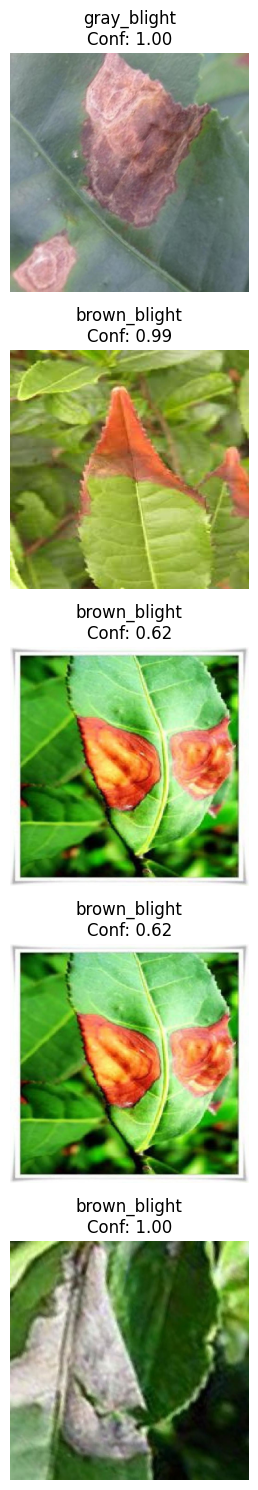

In [1]:
import os
import numpy as np
from random import sample
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

# Load model yang sudah dilatih
model_path = 'inderence time/best_model_efficientnetv2stunned.keras'
model = load_model(model_path)

# Daftar label kelas dari confusion matrix
class_labels = ['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot']

# Path ke folder dataset (pastikan ini diarahkan ke folder gambar Anda)
dataset_path = 'Tea leaf dataset/Tea leaf dataset/Tea red leaf spot'  # Ganti dengan path sebenarnya
image_paths = [os.path.join(dataset_path, fname) for fname in os.listdir(dataset_path) if fname.endswith(('.jpg', '.png'))]

# Validasi apakah jumlah gambar dalam dataset cukup
num_images_to_predict = 5  # Jumlah gambar yang akan diprediksi
if len(image_paths) < num_images_to_predict:
    raise ValueError("Jumlah gambar dalam dataset lebih kecil dari jumlah yang diminta untuk diprediksi.")

# Ambil beberapa gambar secara acak dari dataset
random_image_paths = sample(image_paths, num_images_to_predict)

# Fungsi prediksi untuk satu gambar
def predict_single_image(image_path, model, class_labels):
    # Load dan resize gambar
    img = load_img(image_path, target_size=(384, 384))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch

    # Prediksi
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class_name = class_labels[predicted_class_index]
    confidence = predictions[0][predicted_class_index]

    return predicted_class_name, confidence, img

# Prediksi pada setiap gambar yang dipilih secara acak
print("Hasil Prediksi:")
plt.figure(figsize=(5, 15))  # Atur ukuran grid untuk tampilan gambar (vertikal)
for i, image_path in enumerate(random_image_paths, start=1):
    predicted_class_name, confidence, img = predict_single_image(image_path, model, class_labels)
    
    # Tampilkan hasil di terminal
    print(f"[{i}] Gambar: {os.path.basename(image_path)}")
    print(f"    Diprediksi sebagai: {predicted_class_name}")
    print(f"    Confidence: {confidence:.2f}")
    
    # Plot gambar
    plt.subplot(num_images_to_predict, 1, i)  # Buat grid subplot vertikal
    plt.imshow(img)  # Tampilkan gambar
    plt.title(f"{predicted_class_name}\nConf: {confidence:.2f}")  # Tambahkan prediksi di atas gambar
    plt.axis('off')  # Hilangkan sumbu

plt.tight_layout()
plt.show()
